# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["Target"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [7]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9666666666666667


In [9]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [10]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9333333333333333


In [11]:
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.5s finished


{'fit_time': array([0.00048113, 0.00044799, 0.00045705, 0.00047517, 0.00042892]),
 'score_time': array([0.00085711, 0.00090599, 0.00082803, 0.00080085, 0.00075793]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [12]:
param_grid = [{
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"]
}]

In [13]:
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [14]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [16]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [17]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    return xx, yy

def plot_contours(clf, xx, yy, **parmas):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **parmas)
    return out

In [18]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [19]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df["Target"] = y
iris_comp_df

,0,1,Target
0,23.330736,-12.184991,0
1,20.751772,-11.120772,0
2,20.900232,-12.302054,0
3,20.446451,-11.912196,0
4,23.340191,-12.601237,0
...,...,...,...
145,-15.724772,4.444052,2
146,-12.637948,5.314377,2
147,-14.850269,4.644559,2
148,-16.370121,3.762472,2


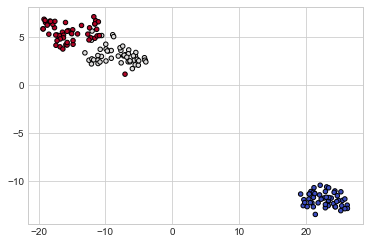

In [20]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

In [21]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

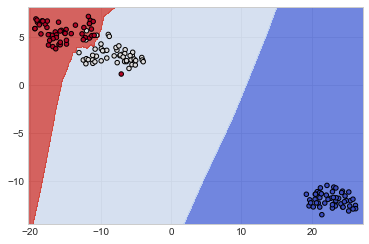

In [22]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

### 유방암 데이터

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df["Target"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df["target"] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207,1
1,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.193700,0.146900,0.1634,0.07224,...,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203,0
2,12.19,13.29,79.08,455.8,0.10660,0.09509,0.028550,0.028820,0.1880,0.06471,...,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241,1
3,14.26,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,0.1704,0.07769,...,23.73,107.00,709.0,0.08949,0.41930,0.67830,0.15050,0.2398,0.10820,1
4,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,12.39,17.48,80.64,462.9,0.10420,0.12970,0.058920,0.028800,0.1779,0.06588,...,23.13,95.23,600.5,0.14270,0.35930,0.32060,0.09804,0.2819,0.11180,1
451,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.066060,0.1842,0.06082,...,27.28,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480,0
452,17.93,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.047440,0.1538,0.05510,...,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948,0
453,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.05871,...,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397,0


In [27]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df["target"] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,...,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520,0
1,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469,0
2,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
3,15.49,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190,0
4,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,25.21,113.70,975.2,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,...,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764,1
110,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,1
111,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,28.87,143.60,1437.0,0.12070,0.47850,0.51650,0.19960,0.2301,0.12240,0
112,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180,1


In [28]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [29]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9428571428571428
평가 데이터 점수 : 0.9385964912280702


In [31]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [32]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.978021978021978
평가 데이터 점수 : 0.9649122807017544


In [33]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [34]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00190735, 0.00133276, 0.00438404, 0.00527811, 0.00524688]),
 'score_time': array([0.0031209 , 0.00373507, 0.00527406, 0.00313902, 0.00753212]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [35]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]
)

In [36]:
param_grid = [{
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["ball_tree", "kd_tree", "brute"]
}]

In [37]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [38]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [39]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [40]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.9701288619779538


In [41]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [42]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df["target"] = y
cancer_comp_df

,0,1,target
0,26.395855,21.937241,0
1,23.822468,20.793123,0
2,23.500473,15.862102,0
3,-17.210693,-1.870417,0
4,25.310518,14.293934,0
...,...,...,...
564,22.678829,22.121269,0
565,24.253433,16.750223,0
566,21.654716,-3.647518,0
567,24.615276,18.656782,0


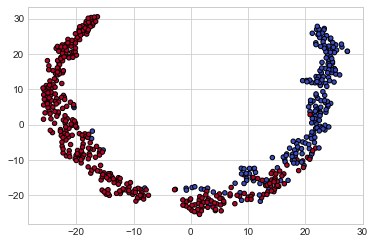

In [43]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k");

In [44]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

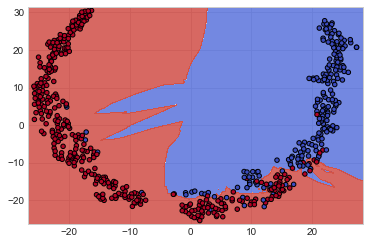

In [45]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k");

### 와인 데이터

In [46]:
wine = load_wine()

In [47]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["Target"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [48]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df["target"] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0,2
1,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1
2,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0,0
3,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
4,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
138,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
139,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0
140,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2


In [50]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df["target"] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
1,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,0
2,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0,0
3,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0,1
4,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
5,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
6,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
7,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,0
8,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560.0,2
9,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0


In [51]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [52]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.8098591549295775
평가 데이터 점수 : 0.6666666666666666


In [54]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [55]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9788732394366197
평가 데이터 점수 : 0.9444444444444444


In [56]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [57]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00197816, 0.00256515, 0.0036571 , 0.0029943 , 0.00568485]),
 'score_time': array([0.00151491, 0.00163794, 0.00170493, 0.0016768 , 0.00197101]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [58]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier())
    ]
)

In [59]:
param_grid = [{
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["ball_tree", "kd_tree", "brute"]
}]

In [60]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [61]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [62]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [63]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.9665079365079364


In [64]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [65]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df["target"] = y
wine_comp_df

,0,1,target
0,-6.354167,8.754184,0
1,-6.253343,8.346928,0
2,-8.143795,10.130795,0
3,-9.979129,12.360965,0
4,-1.348925,1.426557,0
...,...,...,...
173,-0.991127,1.653722,2
174,-1.286444,1.988857,2
175,-2.913716,4.089738,2
176,-3.239980,4.036378,2


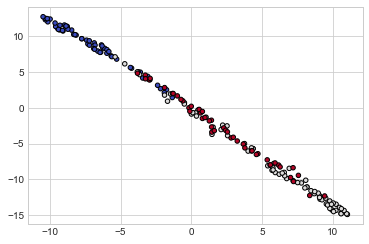

In [66]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k");

In [67]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

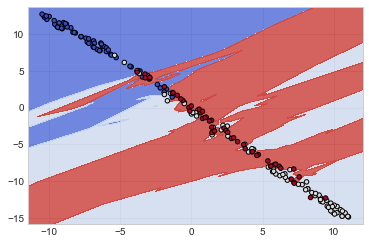

In [68]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k");

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [69]:
boston = load_boston()

In [71]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["TARGET"] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [72]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df["TARGET"] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
1,0.66351,20.0,3.97,0.0,0.647,7.333,100.0,1.8946,5.0,264.0,13.0,383.29,7.79,36.0
2,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
3,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
4,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
400,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17,13.8
401,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40,17.2
402,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,284.0,19.7,395.58,9.50,25.0


In [75]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df["TARGET"] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7
1,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52,17.1
2,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24,13.3
3,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64,22.6
4,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
98,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
99,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69,10.2
100,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8


In [76]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [79]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [80]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7081426204841085
평가 데이터 점수 : 0.5668956597155295


In [81]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [82]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8521603680707459
평가 데이터 점수 : 0.7105321185507667


In [83]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [84]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.00458813, 0.00100517, 0.00100613, 0.00134802, 0.00093913]),
 'score_time': array([0.00232911, 0.00085092, 0.00088596, 0.00088906, 0.00070286]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [85]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor())
    ]
)

In [86]:
param_grid = [{
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["ball_tree", "kd_tree", "brute"]
}]

In [87]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [88]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [89]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [90]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.4973060611762847


In [94]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [95]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df["TARGET"] = y
boston_comp_df

,0,TARGET
0,-4.168596,24.0
1,23.233194,21.6
2,19.500902,34.7
3,20.385431,33.4
4,20.653433,36.2
...,...,...
501,5.425315,22.4
502,6.072276,20.6
503,6.866863,23.9
504,6.823420,22.0


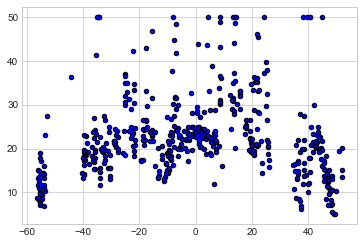

In [97]:
plt.scatter(X_comp[:, 0], y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors="k");

In [98]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

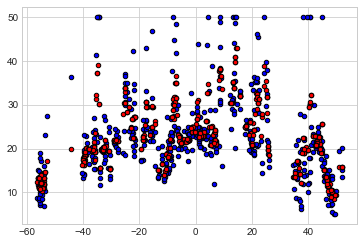

In [101]:
plt.scatter(X_comp[:, 0], y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors="k");
plt.scatter(X_comp[:, 0], predict, c="r", cmap=plt.cm.coolwarm, s=20, edgecolors="k");

### 캘리포니아 데이터

In [102]:
califonia = fetch_california_housing()

In [103]:
califonia_df = pd.DataFrame(data=califonia.data, columns=califonia.feature_names)
califonia_df["TARGET"] = califonia.target
califonia_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [104]:
X, y = califonia.data, califonia.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
califonia_train_df = pd.DataFrame(data=X_train, columns=califonia.feature_names)
califonia_train_df["TARGET"] = y_train
califonia_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,4.5469,28.0,6.197183,1.183099,717.0,5.049296,33.83,-118.28,1.75700
1,5.3015,40.0,6.696296,1.118519,746.0,2.762963,37.71,-122.07,2.54900
2,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56,0.69600
3,4.6406,50.0,6.100000,1.056098,1050.0,2.560976,37.55,-122.32,5.00001
4,5.0434,26.0,5.549822,1.000000,1459.0,2.596085,34.43,-119.74,3.40400
...,...,...,...,...,...,...,...,...,...
16507,2.8940,52.0,4.157895,1.058271,1195.0,2.246241,37.33,-121.91,2.09500
16508,2.9750,30.0,5.292683,1.070301,2250.0,3.228121,38.40,-122.73,1.57300
16509,2.3682,24.0,4.617530,1.103586,2541.0,3.374502,34.09,-117.44,0.97400
16510,5.6674,11.0,6.196970,1.020202,645.0,3.257576,33.02,-116.84,2.09800


In [106]:
califonia_test_df = pd.DataFrame(data=X_test, columns=califonia.feature_names)
califonia_test_df["TARGET"] = y_test
califonia_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,2.1513,43.0,4.407166,1.086319,1531.0,2.493485,32.73,-117.13,1.450
1,3.4821,34.0,4.757188,1.041534,1389.0,4.437700,34.29,-118.42,1.603
2,4.5000,52.0,6.500000,1.700000,24.0,2.400000,36.96,-122.06,2.583
3,3.9643,46.0,5.526316,1.052632,69.0,3.631579,34.00,-118.41,2.750
4,5.8831,19.0,6.881188,1.024752,1320.0,3.267327,38.44,-121.27,2.099
...,...,...,...,...,...,...,...,...,...
4123,2.0285,25.0,5.293038,1.035443,7679.0,4.860127,36.32,-119.93,1.063
4124,6.2984,18.0,6.022801,0.934853,2046.0,3.332248,33.73,-117.97,2.698
4125,3.2375,39.0,5.453416,0.993789,1055.0,3.276398,33.88,-118.26,1.052
4126,1.0000,34.0,4.878788,1.454545,66.0,2.000000,34.20,-118.42,1.875


In [107]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [108]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [109]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.4503157088077966
평가 데이터 점수 : 0.15197909756739958


In [110]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [112]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.792260887611248
평가 데이터 점수 : 0.6941796693935018


In [113]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [114]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.00727606, 0.01129913, 0.01111007, 0.00723696, 0.00726891]),
 'score_time': array([0.15369582, 0.14392805, 0.155653  , 0.1921711 , 0.16688681]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [115]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor())
    ]
)

In [116]:
param_grid = [{
    "model__n_neighbors": [3, 5, 7],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["ball_tree", "kd_tree", "brute"]
}]

In [117]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [118]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [119]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [120]:
print("GridSearchCV best score : {}".format(gs.best_score_))

GridSearchCV best score : 0.5376515274379834


In [121]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [122]:
califonia_comp_df = pd.DataFrame(data=X_comp)
califonia_comp_df["TARGET"] = y
califonia_comp_df

,0,TARGET
0,-94.848640,4.526
1,96.456406,3.585
2,-26.480322,3.521
3,-4.322523,3.413
4,-3.785234,3.422
...,...,...
20635,28.721136,0.781
20636,-70.482613,0.771
20637,66.903549,0.923
20638,40.387218,0.847


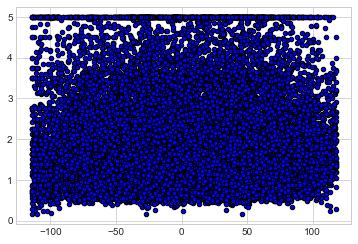

In [123]:
plt.scatter(X_comp[:, 0], y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors="k");

In [124]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

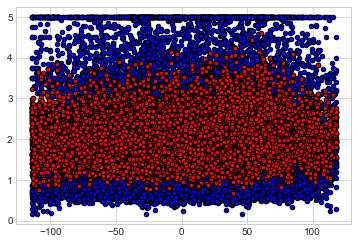

In [125]:
plt.scatter(X_comp[:, 0], y, c="b", cmap=plt.cm.coolwarm, s=20, edgecolors="k");
plt.scatter(X_comp[:, 0], predict, c="r", cmap=plt.cm.coolwarm, s=20, edgecolors="k");